Device with name Apple M1 supports metal minimum requirements
METAL API - DETECTED GPU: Apple M1
Fra:1 Mem:18.61M (Peak 19.44M) | Time:00:00.06 | Syncing Light
Fra:1 Mem:18.61M (Peak 19.44M) | Time:00:00.06 | Syncing Camera
Fra:1 Mem:18.61M (Peak 19.44M) | Time:00:00.06 | Syncing Sphere
Fra:1 Mem:18.87M (Peak 19.44M) | Time:00:00.08 | Syncing Sphere.001
Fra:1 Mem:19.08M (Peak 19.44M) | Time:00:00.08 | Syncing Sphere.002
Fra:1 Mem:19.30M (Peak 19.44M) | Time:00:00.08 | Rendering 1 / 64 samples
Fra:1 Mem:19.25M (Peak 19.44M) | Time:00:00.17 | Rendering 26 / 64 samples
Fra:1 Mem:19.25M (Peak 19.44M) | Time:00:00.22 | Rendering 51 / 64 samples
Fra:1 Mem:19.25M (Peak 19.44M) | Time:00:00.25 | Rendering 64 / 64 samples
Saved: 'test_sphere.png'
 Time: 00:00.37 (Saving: 00:00.11)



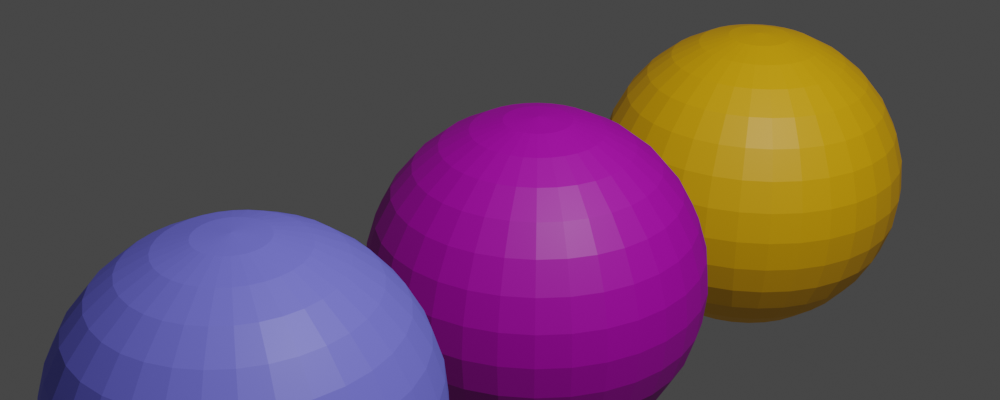

In [1]:
import bpy
from IPython.display import Image, display

def make_sphere(color, location):
    bpy.ops.mesh.primitive_uv_sphere_add(
        radius=1,
        enter_editmode=False,
        align="WORLD",
        location=location
    )
    sphere = bpy.context.active_object

    # Create a material with the provided color
    material = bpy.data.materials.new(name=f"Material {color}")
    material.use_nodes = True
    nodes = material.node_tree.nodes
    nodes["Principled BSDF"].inputs["Base Color"].default_value = color
    sphere.data.materials.append(material)

# Clear all existing mesh objects
bpy.ops.object.select_all(action="DESELECT")
bpy.ops.object.select_by_type(type="MESH")
bpy.ops.object.delete()


# Define colors (R, G, B, A)
blue = (0.2, 0.2, 1, 1)
purple = (0.5, 0, 0.5, 1)
orange = (1, 0.5, 0, 1)

# Call the make_sphere function
make_sphere(blue, (0, 0, 0))
make_sphere(purple, (0, 2, 0))
make_sphere(orange, (0, 4, 0))

# Render settings
bpy.context.scene.render.resolution_x = 1000
bpy.context.scene.render.resolution_y = 400
bpy.context.scene.render.image_settings.file_format = "PNG"
bpy.context.scene.render.filepath = "test_sphere.png"


camera = bpy.data.objects["Camera"]
camera.location = (5, -3, 4)a



# Render the image
bpy.ops.render.render(write_still=True)

# Save the image to the specified filepath
bpy.data.images["Render Result"].save_render(filepath=bpy.context.scene.render.filepath)

display(Image("test_sphere.png"))